### Tensors
Rank 0 tensors are Scalers\
Rank 1 tensors are arrays\
Rank 3 tensors are Matrices\
Tensors contains three key attributes : Axes, Shape, dataType

In [1]:
import numpy as np
rank0 = np.array(12)
rank1 = np.array([1, 2, 3])
rank2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
rank3 = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
                  [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
                  [[19, 20, 21], [22, 23, 24], [25, 26, 27]]])
axes = rank0.ndim, rank1.ndim, rank2.ndim, rank3.ndim
print("axes", axes)
shape = rank0.shape, rank1.shape, rank2.shape, rank3.shape
print("shape", shape)
datatypes = rank0.dtype, rank1.dtype, rank2.dtype, rank3.dtype
print("datatypes", datatypes)

axes (0, 1, 2, 3)
shape ((), (3,), (3, 3), (3, 3, 3))
datatypes (dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'))


Example of the available tensor attributes using MNIST database

(60000, 28, 28)
uint8


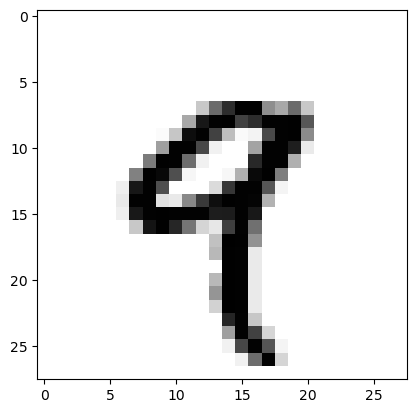

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_images.dtype)
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**Tensor Slicing** is the process of selecting elements in a tensor.\
**First Axis** of the data tensor is called samples axis.\
When considering batches the first axis is called **Batch Axis**

In [3]:
first_sclice = train_images[10:100, : , :]
print(first_sclice.shape)

(90, 28, 28)


**Data Tensors** will always fall into one of the following categories.\
**Vector Data** - Rank 2 tensor of the shape (Sample, Features). \
**Timeseries data or Sequence data** - Rank 3 tensor of the shape (samples, timesteps, features). \
**Images** - Rank 4 tensors of shape (samples, height, width, channels). \
**Video** - Rank 5 tensor of shape (samples, frames, height, width, channels). 

**Vector Data Example**\
The data of gender and age of 10,000 people can be stores in a tensor of the shape (10000, 2) where 10,000 arrays of two values are presented.

**Timeseries Data or Sequence Data Example** \
Recording stock price of a stock is an example. The highest and the lowest price of the minute is recorded in each minute. There are 390 active stock minutes and 250 active stock days. Therefore a tensor of the shape (250,390,2) can be used to store this data.

**Image Data** \
To store 128 images with 256 x 256 pixels and the RGB representation, we can use a rank 4 tensor of the shape (128,256,256,3).

**Video Data** \
A video is a sequence of frames. A YouTube video which have 60 seconds and 144x256 resolution and 4 frames per second can be stores in a rank 5 tensor. So 4 such videos can be stored in a tensor which has the shape of (4, 240, 144, 256, 3)

**Tensor Operations** \
All transformations learned by deep neural network can be reduced to tensor operations.\

*Element-wise operations* \
operations that are applied independently to each entry in the tensors being considered. Dot operation and element-wise addition can be considered as examples.

In [4]:
import numpy as np
x = np.random.random((20, 100))
y = np.random.random((20, 100))
print(x.shape)
print(y.shape)

z = x + y #Element-wise addition
print(z)
z = np.maximum(z, 0.) #Element-wise ReLU
print(z)

(20, 100)
(20, 100)
[[1.01555762 0.73690458 0.51387166 ... 1.18858553 1.04847309 1.20867557]
 [1.1338832  0.9442322  0.34078703 ... 0.84699975 0.44849796 0.99036479]
 [1.14758528 0.5503791  1.21364131 ... 0.92528599 1.03839236 0.88844451]
 ...
 [1.45416179 0.78196594 1.28614945 ... 0.87333899 1.07420109 0.43337333]
 [1.0228646  1.17655137 1.53688811 ... 1.14517991 1.19250443 1.4806409 ]
 [1.60441231 1.18441738 0.87166395 ... 1.16091929 1.35519129 1.87619353]]
[[1.01555762 0.73690458 0.51387166 ... 1.18858553 1.04847309 1.20867557]
 [1.1338832  0.9442322  0.34078703 ... 0.84699975 0.44849796 0.99036479]
 [1.14758528 0.5503791  1.21364131 ... 0.92528599 1.03839236 0.88844451]
 ...
 [1.45416179 0.78196594 1.28614945 ... 0.87333899 1.07420109 0.43337333]
 [1.0228646  1.17655137 1.53688811 ... 1.14517991 1.19250443 1.4806409 ]
 [1.60441231 1.18441738 0.87166395 ... 1.16091929 1.35519129 1.87619353]]


**Broadcasting** \
Broadcasting is the process of matching two vectors to be in the same shape when a elementwise operation is performed. This process consists of two steps:
 - Axes are added to the smaller tensor to match the larger tensors shape.
 - The smaller tensor is then repeated alongside these axes to match the full shape. 

The repetition operation is entirely virtual: it happens at the algorithmic level rather than at the memory level. But thinking of the vector being repeated 10 times alongside a new axis is a helpful mental model.

In [5]:
import numpy as np
x = np.random.random((32,10))
y = np.random.random((10,))
y1 = y.copy()
print(y.shape)
print(y)
print()

y = np.expand_dims(y, axis=0)
print(y.shape)
print(y)
print()

y = np.concatenate([y]*32, axis=0)
print(y.shape)
print(y)
print()

print(np.array_equal(np.maximum(x, y), np.maximum(x, y1)))

(10,)
[0.81442217 0.64900676 0.43480117 0.96927029 0.65364736 0.26079234
 0.19150778 0.4286204  0.58008238 0.94428811]

(1, 10)
[[0.81442217 0.64900676 0.43480117 0.96927029 0.65364736 0.26079234
  0.19150778 0.4286204  0.58008238 0.94428811]]

(32, 10)
[[0.81442217 0.64900676 0.43480117 0.96927029 0.65364736 0.26079234
  0.19150778 0.4286204  0.58008238 0.94428811]
 [0.81442217 0.64900676 0.43480117 0.96927029 0.65364736 0.26079234
  0.19150778 0.4286204  0.58008238 0.94428811]
 [0.81442217 0.64900676 0.43480117 0.96927029 0.65364736 0.26079234
  0.19150778 0.4286204  0.58008238 0.94428811]
 [0.81442217 0.64900676 0.43480117 0.96927029 0.65364736 0.26079234
  0.19150778 0.4286204  0.58008238 0.94428811]
 [0.81442217 0.64900676 0.43480117 0.96927029 0.65364736 0.26079234
  0.19150778 0.4286204  0.58008238 0.94428811]
 [0.81442217 0.64900676 0.43480117 0.96927029 0.65364736 0.26079234
  0.19150778 0.4286204  0.58008238 0.94428811]
 [0.81442217 0.64900676 0.43480117 0.96927029 0.65364736

**Tensor product or Dot product**\
You can take the dot product of two matrices x and y (dot(x, y)) if and only if x.shape[1]==y.shape[0]. The result is a matrix with shape (x.shape[0], y shape[1]), where the coefficients are the vector products between the rows of x and the columns of y.

In [6]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1 
    assert len(y.shape) == 1 
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2 
    assert len(y.shape) == 2 
    assert x.shape[1] == y.shape[0] 
    z = np.zeros((x.shape[0], y.shape[1])) 
    for i in range(x.shape[0]): 
        for j in range(y.shape[1]): 
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

import numpy as np
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])
z = np.dot(x, y)
print(x.shape,y.shape,z.shape)
print(z)
print()

z = naive_matrix_dot(x, y)
print(z)

(2, 2) (2, 2) (2, 2)
[[19 22]
 [43 50]]

[[19. 22.]
 [43. 50.]]


**Tensor Reshaping**\
Reshaping a tensor means rearranging its rows and columns to match a target shape.  Transposing a matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]

In [7]:
x = np.random.random((64, 3))
print(x.shape)
x = x.reshape(64*3, 1)
print(x.shape)
x = np.transpose(x)
print(x.shape)

(64, 3)
(192, 1)
(1, 192)


**Gradian Tape in tensorflow** \
It’s a Python scope that will “record” the tensor operations that run inside it, in the form of a computation graph. This graph can then be used to retrieve the gradient of any output with respect to any variable or set of variables.

In [4]:
import tensorflow as tf
x = tf.Variable(10.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_with_respect_to_x = tape.gradient(y, x)
print(grad_of_y_with_respect_to_x)

tf.Tensor(2.0, shape=(), dtype=float32)


**First Model**

In [8]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [12]:
import tensorflow.keras as keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 7ms/step - loss: 0.2571 - accuracy: 0.9268
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1046 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0685 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0502 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0376 - accuracy: 0.9890


In [27]:
import numpy as np
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels[:10])
print(test_labels[:10])
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]
accuracy: 0.98
